In [34]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate

In [116]:
#simple two node model

a=0.5 #self
c=0.1 #external
d=0.5 #self


def Q1(t): #piecewise constant with surge between t=10 and t=15
    if t<10:
        return 1
    elif t>=10 and t<15:
        return 2
    else :
        return 1
    
Q2 = 1.1 #at equilibrium

def b(t):
    return 0.2*Q1(t) #time dependance is optional, can keep this as a constant too, depends on anticipation/real time need

#model eqns
def func(z,t, Q1, b):
    P1, P2 = z
    return [Q1(t+1)-a*P1-b(t)*P2,Q2-c*P1-d*P2]

z0 = [1.2,2] #initial val
t = np.linspace(0,48,100) #time
args = (Q1,b,)
soln=sp.integrate.odeint(func, z0, t, args)

P1 = soln[:, 0]
P2 = soln[:, 1]


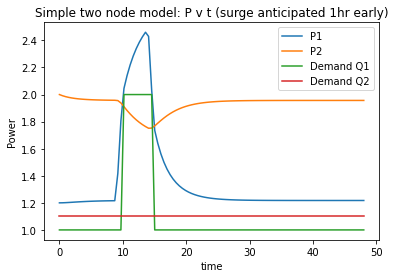

In [118]:
#plots

plt.figure()
plt.plot(t, P1, label='P1')
plt.plot(t, P2, label='P2')
plt.plot(t, [Q1(s) for s in t], label='Demand Q1')
plt.plot(t, [Q2]*len(t), label='Demand Q2')
plt.xlabel('time')
plt.ylabel('Power')
plt.title('Simple two node model: P v t (surge anticipated 1hr early)')
plt.legend(loc=0)